## Case Study: Logistic Regression

#### Performing a logistic regression on employee_retention data (binary classification)

In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# Loading the dataset
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
#displaying few rows of the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Wrangling

In [4]:
# shape of the data
df.shape

(14999, 10)

- There are 14,999 records of customers with 10 features

In [5]:
# datatypes of the data
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
# checking for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
# checking for duplicates
df.duplicated().sum()

3008

- There are 3008 duplicated record in the dataset which will be dropped

In [8]:
# checking for number of unique values in the department
df['Department'].nunique()

10

In [9]:
# the count of each department in the dataset
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
# unique values in the salary
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
#checking the descriptive statistics of the numerical features
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Cleaning

- Rename column names
- Drop duplicated records

In [12]:
# renaming columns
df.rename(columns = {'Work_accident': 'work_accident', 'left': 'retention', 'Department': 'department'}, inplace=True)

In [14]:
# confirming columns has been renamed
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,retention,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [28]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [29]:
#confirming duplicates has been dropped
df.duplicated().sum()

0

## Data Exploration

### Univariate Exploration

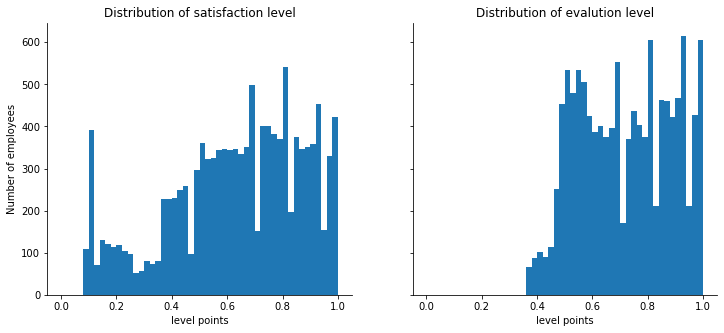

In [30]:
# plotting the distribution of satisfaction_level and last_evaluation
fig, ax = plt.subplots(1, 2, figsize=[12,5], sharey=True)

#defining the bins for the histogram
bins = np.arange(0, df['satisfaction_level'].max()+0.02, 0.02)
bin_edge = np.arange(0, df['last_evaluation'].max()+0.02, 0.02)

#plotting the histogram
ax[0].hist(df['satisfaction_level'], bins=bins)
ax[1].hist(df['last_evaluation'], bins = bin_edge)


#setting the titles
ax[0].set_title('Distribution of satisfaction level')
ax[0].set_ylabel('Number of employees')
ax[0].set_xlabel('level points')
ax[1].set_title('Distribution of evalution level')
ax[1].set_xlabel('level points')

#removing the borders
ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)
plt.show()


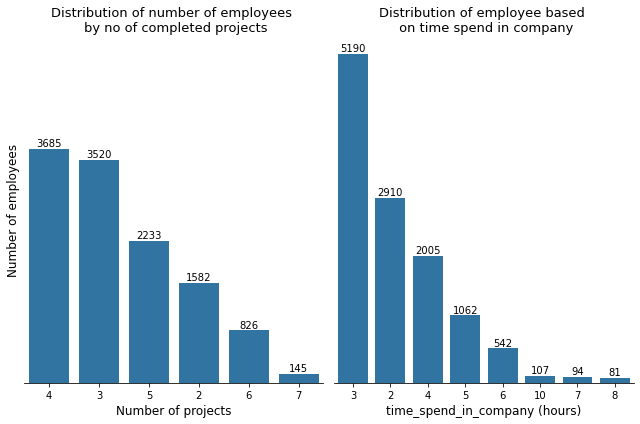

In [18]:
# plotting the distribution of satisfaction_level

# defining the the figure
fig, ax = plt.subplots(1, 2, figsize=[9,6], sharey=True)

#defining the x and y values and order for satisfaction_level
x = df['number_project'].value_counts().index
y = df['number_project'].value_counts().values
order = df['number_project'].value_counts().index

#defining the x and y values and order for time_spend_company
x1 = df['time_spend_company'].value_counts().index
y1 = df['time_spend_company'].value_counts().values
order1 = df['time_spend_company'].value_counts().index

#setting the basecolor
base_color = sns.color_palette()[0]

#plotting the bar chart
sns.barplot(x=x, y=y, order=order, color=base_color, ax=ax[0])
sns.barplot(x=x1, y=y1, order=order1, color=base_color, ax=ax[1])

# annotating the bar chart
for index, value in enumerate(df['number_project'].value_counts().values):
    ax[0].annotate(value, xy=(index, value+90), ha='center', va='center')

for index, value in enumerate(df['time_spend_company'].value_counts().values):
    ax[1].annotate(value, xy=(index, value+90), ha='center', va='center')

    
#setting the labels and title, removing border and yticks    
ax[0].set_xlabel('Number of projects', fontsize=12)
ax[0].set_ylabel('Number of employees', fontsize=12)
ax[0].set_title('Distribution of number of employees \n by no of completed projects', fontsize=13)
ax[0].spines[['right', 'left', 'top']].set_visible(False)
ax[0].yaxis.set_ticks([])

ax[1].set_xlabel('time_spend_in_company (hours)', fontsize=12)
#ax[1].set_ylabel('Number of employees', fontsize=12)
ax[1].set_title('Distribution of employee based \n on time spend in company', fontsize=13)
ax[1].spines[['right', 'left', 'top']].set_visible(False)
ax[1].yaxis.set_ticks([])

plt.tight_layout()
fig.tight_layout()
plt.show()


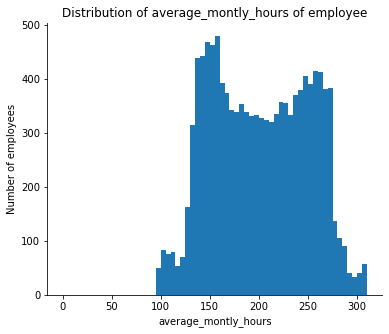

In [19]:
#plotting distribution of average montly hours
fig, ax=plt.subplots(figsize=[6,5])


bins = np.arange(0, df['average_montly_hours'].max()+5, 5)
ax.hist(df['average_montly_hours'], bins=bins)



ax.set_title('Distribution of average_montly_hours of employee')
ax.set_ylabel('Number of employees')
ax.set_xlabel('average_montly_hours')
ax.spines[['top', 'right']].set_visible(False)

plt.show()

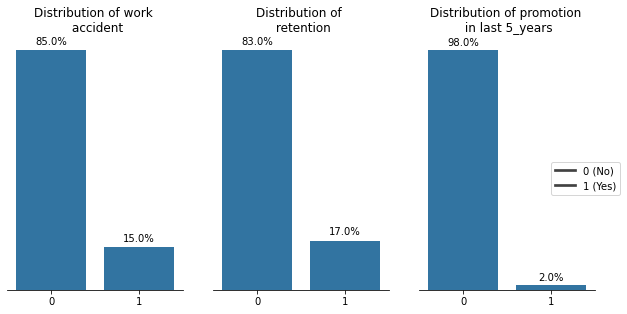

In [20]:
# plotting the distribution of work_acident, retention and promotion_last_5years

fig, ax = plt.subplots(1, 3, figsize=(9,5))


#creating the percentage
m = df['work_accident'].value_counts().values
n = df['retention'].value_counts().values
o = df['promotion_last_5years'].value_counts().values
perc = []
perc1 = []
perc2 = []

for i in m:
    per = (i/ sum(m)) * 100
    perc.append(per.round())
for i in n:
    per = (i/ sum(n)) * 100
    perc1.append(per.round())
for i in o:
    per = (i/ sum(o)) * 100
    perc2.append(per.round())

df3 = pd.DataFrame({'work_accident': perc, 
                    'retention': perc1,
                   'promotion_last_5years': perc2})


base_color = sns.color_palette()[0]
sns.barplot(x=df3.index.values, y=df3['work_accident'].value_counts().index, color=base_color, ax=ax[0])
sns.barplot(x=df3.index.values, y=df3['retention'].value_counts().index, color=base_color, ax=ax[1])
sns.barplot(x=df3.index.values, y=df3['promotion_last_5years'].value_counts().index, color=base_color, ax=ax[2])

#removing borders and yticks
ax[0].spines[['top', 'right','left']].set_visible(False)
ax[1].spines[['top', 'right', 'left']].set_visible(False)
ax[2].spines[['top', 'right', 'left']].set_visible(False)

ax[0].yaxis.set_ticks([])
ax[1].yaxis.set_ticks([])
ax[2].yaxis.set_ticks([])

#setting the x_label and title
ax[0].set_title('Distribution of work \n accident')
ax[1].set_title('Distribution of \n retention')
ax[2].set_title('Distribution of promotion \n in last 5_years')


for index, value in enumerate(df3['work_accident'].value_counts().index):
        ax[0].annotate(str(value)+'%', xy=(index, value+3), ha='center', va='center')
        
for index, value in enumerate(df3['retention'].value_counts().index):
        ax[1].annotate(str(value)+'%', xy=(index, value+3), ha='center', va='center')
        
for index, value in enumerate(df3['promotion_last_5years'].value_counts().index):
        ax[2].annotate(str(value)+'%', xy=(index, value+3), ha='center', va='center')

fig.legend(['0 (No)', '1 (Yes)'], bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=3)
plt.show()


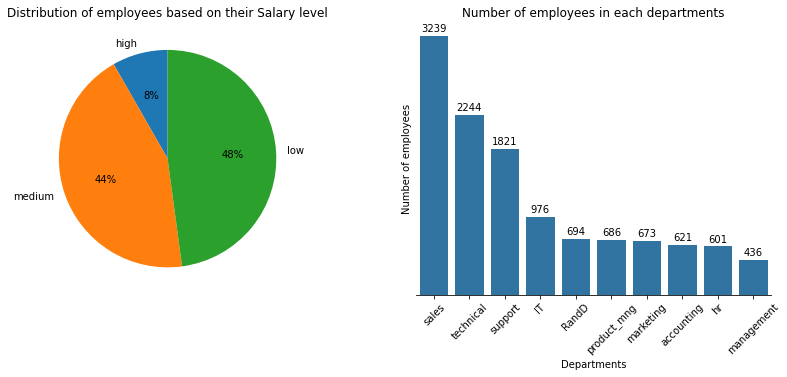

In [21]:
#plotting a distribution of the department and salary level

fig, ax = plt.subplots(1,2, figsize=(14,5))

order = df['department'].value_counts().index

#plotting the charts
ax[0].pie( x=df['salary'].value_counts().sort_values(ascending=True).values, 
          labels=df['salary'].value_counts().sort_values(ascending=True).index, 
          autopct='%.0f%%', 
          startangle=90
         )
sns.countplot(data = df, x='department', order=order, color=base_color, ax=ax[1])

#annotating the bar chart
for index, value in enumerate(df['department'].value_counts().values):
    ax[1].annotate(value, xy=(index, value+90), ha='center', va='center')

#removing border
ax[1].spines[['top', 'right', 'left']].set_visible(False)
ax[1].yaxis.set_ticks([])
ax[1].set_title('Number of employees in each departments')
ax[1].set_ylabel('Number of employees')
ax[1].set_xlabel('Departments')
ax[0].set_title('Distribution of employees based on their Salary level')

plt.xticks(rotation=45)
plt.show()

#### Distribution of employee on salary level
- 48% of the employees are low salary earner 
- 44% of the employee are medium salary earner.
- Only 8% of the employee are top earner

#### Distribution of employee in each department
- The top three department with large number of employees are sales(3239), technical(2244) and support(1821)


### Bivariate Exploration

#### Distribution of retention vs department

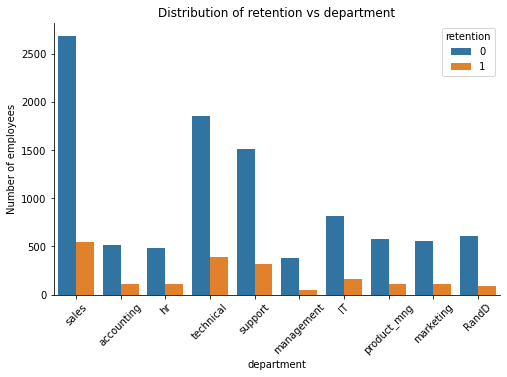

In [51]:
# plotting a Distribution of retention vs department
fig, ax = plt.subplots(1, 1, figsize=[8,5])

sns.countplot(data=df, x='department', hue='retention')
ax.xaxis.set_tick_params(rotation=45)
ax.set_title('Distribution of retention vs department')
ax.set_ylabel('Number of employees')
ax.spines[['top', 'right']].set_visible(False)
plt.show()

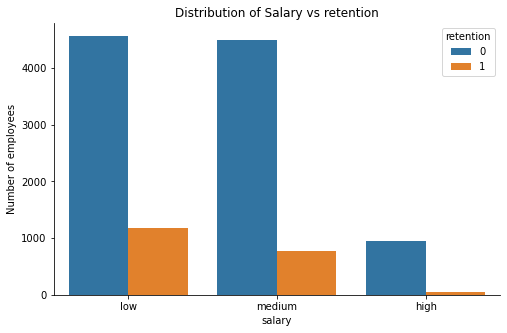

In [54]:
#plotting a distribution of salary against retention
fig, ax = plt.subplots(1, 1, figsize=[8,5])

sns.countplot(data=df, x='salary', hue='retention')
ax.set_title('Distribution of Salary vs retention')
ax.set_ylabel('Number of employees')
ax.spines[['top', 'right']].set_visible(False)

plt.show()

- Low income and medium income earner are churned more

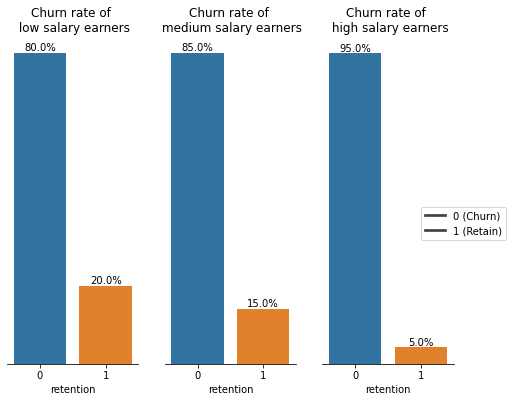

In [83]:
#filtering by salary category
low_income = df.query('salary == "low"').groupby(['retention'], as_index=False).agg(total=('retention', 'count'))
medium_income = df.query('salary == "medium"').groupby(['retention'], as_index=False).agg(total=('retention', 'count'))
high_income = df.query('salary == "high"').groupby(['retention'], as_index=False).agg(total=('retention', 'count'))

#create a table by grouping based on the retention and counting each categories
low_perc= []
for x in low_income['total'].values:
    perc = ((x/(low_income['total'].sum()))*100).round()
    low_perc.append(perc)
low_income['percent'] = low_perc

medium_perc= []
for x in medium_income['total'].values:
    perc = ((x/(medium_income['total'].sum()))*100).round()
    medium_perc.append(perc)
medium_income['percent'] = medium_perc

high_perc= []
for x in high_income['total'].values:
    perc = ((x/(high_income['total'].sum()))*100).round()
    high_perc.append(perc)
high_income['percent'] = high_perc

#plotting a barplot of churn rate of each salary income categories
fig, ax = plt.subplots(1, 3, figsize=[8,6])
sns.barplot(data=low_income, x='retention', y='percent', ax=ax[0])
sns.barplot(data=medium_income, x='retention', y='percent', ax=ax[1])
sns.barplot(data=high_income, x='retention', y='percent', ax=ax[2])

#Removing the border
ax[0].spines[['top', 'right', 'left']].set_visible(False)
ax[1].spines[['top', 'right', 'left']].set_visible(False)
ax[2].spines[['top', 'right', 'left']].set_visible(False)

#Setting the title
ax[0].set_title('Churn rate of \n low salary earners')
ax[1].set_title('Churn rate of \n medium salary earners')
ax[2].set_title('Churn rate of \n high salary earners')


fig.legend(['0 (Churn)', '1 (Retain)'], bbox_to_anchor=(1, 0.5))
for index, value in enumerate(low_income['percent'].values):
    ax[0].annotate(str(value)+'%', xy=(index, value+1.5), va='center', ha='center')
for index, value in enumerate(medium_income['percent'].values):
    ax[1].annotate(str(value)+'%', xy=(index, value+1.5), va='center', ha='center')
for index, value in enumerate(high_income['percent'].values):
    ax[2].annotate(str(value)+'%', xy=(index, value+1.5), va='center', ha='center')
    
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
ax[2].yaxis.set_visible(False)
plt.show()

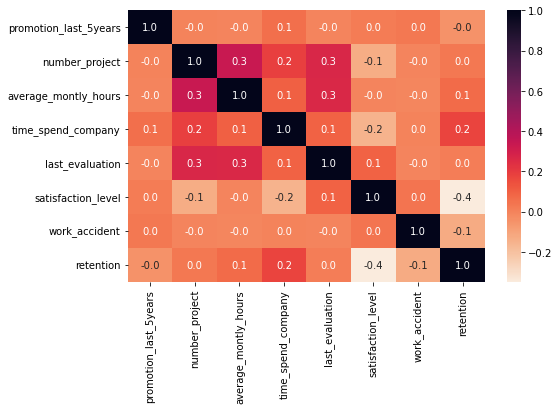

In [101]:
#plotting a heatmap of the features
vars=['promotion_last_5years', 'number_project', 'average_montly_hours', 
      'time_spend_company', 'last_evaluation', 'satisfaction_level', 'work_accident', 'retention']
fig, ax = plt.subplots(figsize=[8,5])
sns.heatmap(df[vars].corr(), cmap='rocket_r', annot=True, fmt='.1f')
plt.show()

### Logistic Regression

#### Selecting the variables

In [45]:
#defining the X variable
X = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'salary']]

In [46]:
# Selecting the y variable
y = df['retention'].values

In [37]:
# Data Preprocessing

#defining the numerical X variables
numerical_features = ['satisfaction_level', 'average_montly_hours', 'time_spend_company']
numerical_features

['satisfaction_level', 'average_montly_hours', 'time_spend_company']

In [38]:
#defining the categorical X variables
categorical_features = ['salary']
categorical_features

['salary']

In [36]:
#importing the modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
#defining a numerical transformer
numerical_transformer = Pipeline([
    ('scale', StandardScaler())
])

In [40]:
#defining the categorical transformer
categorical_transformer = Pipeline([
    ('ohe_salary', OneHotEncoder())
])

In [41]:
#defining the preprocessor
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [42]:
#importing the LogisticRegression module
from sklearn.linear_model import LogisticRegression

In [60]:
#defining my pipeline
my_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [44]:
#import the module for splitting dataset
from sklearn.model_selection import train_test_split

In [47]:
#split the dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
#fit our training dataset to the pipeline
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['satisfaction_level',
                                                   'average_montly_hours',
                                                   'time_spend_company']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe_salary',
                                                                   OneHotEncoder())]),
                                                  ['salary'])])),
                ('classifier', LogisticRegression())])

In [62]:
#checking the accuracy score
my_pipeline.score(X_test, y_test)

0.8449353897457273

In [64]:
#displaying a diagram of my_pipeline

from sklearn import set_config
set_config(display='diagram')

In [65]:
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['satisfaction_level',
                                                   'average_montly_hours',
                                                   'time_spend_company']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe_salary',
                                                                   OneHotEncoder())]),
                                                  ['salary'])])),
                ('classifier', LogisticRegression())])

In [69]:
#predicting the y_test
y_predict = my_pipeline.predict(X_test)

In [70]:
#displaying the predicted values
y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)